# Develop Linear and Non-Linear (polynomial with degree n) regression models for predicting cases and deaths in US

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import plotly.express as px

### Start from 2020.06.01 (Monday) to 2021.01.03 (Sunday) of infections in US. X-Axis - number of days, Y-Axis - number of new cases and deaths

In [2]:
cases = pd.read_csv('../covid_confirmed_usafacts.csv')
cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


In [3]:
selected_date_columns = [col for col in cases.columns if '2020-06-01' <= col <= '2021-01-03']
cases = cases[selected_date_columns].diff(axis=1).dropna(axis=1)
cases.head()

,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,...,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,2,7,11,6,7,10,13,17,...,48,9,30,36,40,59,26,49,29,37
2,0,0,1,3,8,9,7,5,6,12,...,145,42,117,137,210,220,209,222,132,109
3,3,2,0,6,7,3,4,2,9,6,...,6,2,8,11,45,30,22,3,11,2
4,0,0,0,0,1,0,2,6,4,4,...,14,14,7,16,30,25,17,20,9,19


In [4]:
deaths = pd.read_csv('../covid_deaths_usafacts.csv')
deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


In [5]:
selected_date_columns = [col for col in deaths.columns if '2020-06-01' <= col <= '2021-01-03']
deaths= deaths[selected_date_columns].diff(axis=1).dropna(axis=1)
deaths.head()

,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,...,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,2,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,4,4,1,8,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0


In [6]:
daily_cases = []
for col in cases.columns:
    daily_cases.append(cases[col].sum())
daily_cases_data = pd.Series(daily_cases)
daily_cases_data

0       21795
1       21372
2       21923
3       28884
4       23787
        ...  
211    282351
212    236987
213    165207
214    232897
215    226866
Length: 216, dtype: int64

In [7]:
daily_deaths = []
for col in deaths.columns:
    daily_deaths.append(deaths[col].sum())
daily_deaths_data = pd.Series(daily_deaths)
daily_deaths_data


0      1222
1       988
2       972
3      1095
4       781
       ... 
211    3547
212    3600
213    2684
214    3452
215    2345
Length: 216, dtype: int64

In [12]:
days = np.arange(len(daily_cases_data))

# Linear Regression for Cases
lr_cases = LinearRegression()
lr_cases.fit(days.reshape(-1, 1), daily_cases_data)
cases_linear_predictions = lr_cases.predict(days.reshape(-1, 1))

# Linear Regression for Deaths
lr_deaths = LinearRegression()
lr_deaths.fit(days.reshape(-1, 1), daily_deaths_data)
deaths_linear_predictions = lr_deaths.predict(days.reshape(-1, 1))

# Polynomial Regression (Example: Degree 2)
degree = 4
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(days.reshape(-1, 1))

# Polynomial Regression for Cases
pr_cases = LinearRegression()
pr_cases.fit(X_poly, daily_cases_data)
cases_poly_predictions = pr_cases.predict(X_poly)

# Polynomial Regression for Deaths
pr_deaths = LinearRegression()
pr_deaths.fit(X_poly, daily_deaths_data)
deaths_poly_predictions = pr_deaths.predict(X_poly)

# Calculate Root Mean Square Error (RMSE) for each model
rmse_linear_cases = np.sqrt(mean_squared_error(daily_cases_data, cases_linear_predictions))
rmse_linear_deaths = np.sqrt(mean_squared_error(daily_deaths_data, deaths_linear_predictions))
rmse_poly_cases = np.sqrt(mean_squared_error(daily_cases_data, cases_poly_predictions))
rmse_poly_deaths = np.sqrt(mean_squared_error(daily_deaths_data, deaths_poly_predictions))

# Create a DataFrame for visualization
df = pd.DataFrame({'Days': days,
                   'Actual Cases': daily_cases_data,
                   'Cases Linear Predictions': cases_linear_predictions,
                   f'Cases Polynomial (Degree {degree}) Predictions': cases_poly_predictions,
                   'Actual Deaths': daily_deaths_data,
                   'Deaths Linear Predictions': deaths_linear_predictions,
                   f'Deaths Polynomial (Degree {degree}) Predictions': deaths_poly_predictions})

# Create Plotly line charts
fig_cases = px.line(df, x='Days', y=['Actual Cases', 'Cases Linear Predictions',
                                    f'Cases Polynomial (Degree {degree}) Predictions'],
                    labels={'value': 'Number of Cases'}, title='Cases Linear vs. Polynomial Regression')
fig_deaths = px.line(df, x='Days', y=['Actual Deaths', 'Deaths Linear Predictions',
                                      f'Deaths Polynomial (Degree {degree}) Predictions'],
                     labels={'value': 'Number of Deaths'}, title='Deaths Linear vs. Polynomial Regression')

fig_cases.show()
fig_deaths.show()

In [9]:
# Print RMSE values
print(f'RMSE for Cases (Linear): {rmse_linear_cases:.2f}')
print(f'RMSE for Deaths (Linear): {rmse_linear_deaths:.2f}\n')
print(f'RMSE for Cases (Polynomial Degree {degree}): {rmse_poly_cases:.2f}')
print(f'RMSE for Deaths (Polynomial Degree {degree}): {rmse_poly_deaths:.2f}')

RMSE for Cases (Linear): 40066.91
RMSE for Deaths (Linear): 611.96

RMSE for Cases (Polynomial Degree 2): 28815.85
RMSE for Deaths (Polynomial Degree 2): 461.38


In [13]:
# Convert cases and deaths to 1D arrays
cases = np.array(cases).flatten()
deaths = np.array(deaths).flatten()

# Create a feature matrix for the number of days
X = np.arange(len(cases)).reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_cases_train, y_cases_test, y_deaths_train, y_deaths_test = train_test_split(
    X, cases, deaths, test_size=0.2, random_state=42
)

# Linear Regression Model
linear_model_cases = LinearRegression()
linear_model_cases.fit(X_train, y_cases_train)

linear_model_deaths = LinearRegression()
linear_model_deaths.fit(X_train, y_deaths_train)

# Non-Linear (Polynomial) Regression Model
degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_train)

poly_model_cases = LinearRegression()
poly_model_cases.fit(X_poly, y_cases_train)

poly_model_deaths = LinearRegression()
poly_model_deaths.fit(X_poly, y_deaths_train)

# Make predictions on the test set
linear_cases_pred = linear_model_cases.predict(X_test)
linear_deaths_pred = linear_model_deaths.predict(X_test)

X_test_poly = poly_features.transform(X_test)
poly_cases_pred = poly_model_cases.predict(X_test_poly)
poly_deaths_pred = poly_model_deaths.predict(X_test_poly)

# Calculate RMSE
rmse_linear_cases = np.sqrt(mean_squared_error(y_cases_test, linear_cases_pred))
rmse_linear_deaths = np.sqrt(mean_squared_error(y_deaths_test, linear_deaths_pred))
rmse_poly_cases = np.sqrt(mean_squared_error(y_cases_test, poly_cases_pred))
rmse_poly_deaths = np.sqrt(mean_squared_error(y_deaths_test, poly_deaths_pred))

print("RMSE Linear Cases:", rmse_linear_cases)
print("RMSE Linear Deaths:", rmse_linear_deaths)
print("RMSE Polynomial Cases (Degree {}):".format(degree), rmse_poly_cases)
print("RMSE Polynomial Deaths (Degree {}):".format(degree), rmse_poly_deaths)

RMSE Linear Cases: 188.46062548116043
RMSE Linear Deaths: 2.59184254428812
RMSE Polynomial Cases (Degree 4): 188.2637524655453
RMSE Polynomial Deaths (Degree 4): 2.589050037452341


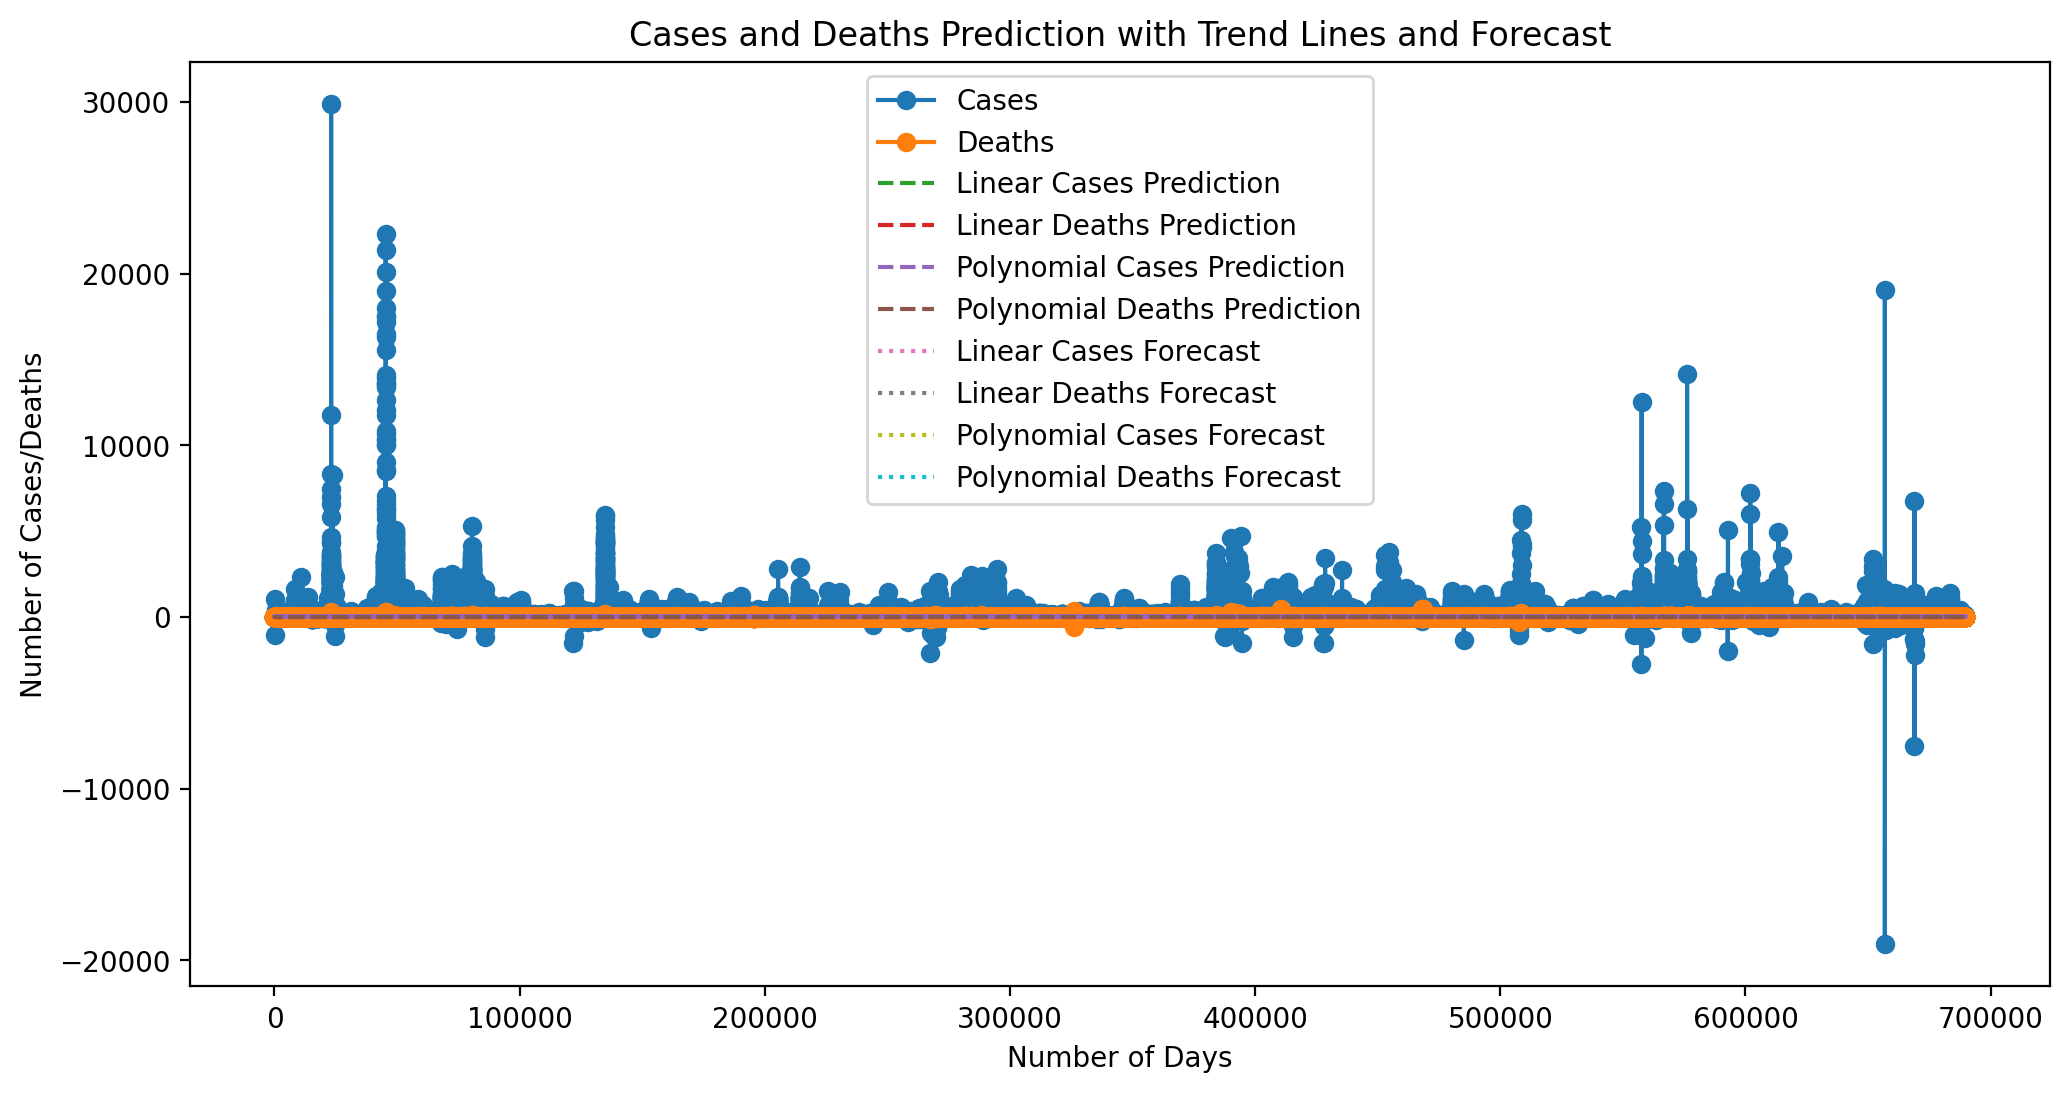

In [11]:
forecast_days = 7
next_week = np.arange(len(cases), len(cases) + forecast_days).reshape(-1, 1)

linear_cases_forecast = linear_model_cases.predict(next_week)
linear_deaths_forecast = linear_model_deaths.predict(next_week)

poly_next_week = poly_features.transform(next_week)
poly_cases_forecast = poly_model_cases.predict(poly_next_week)
poly_deaths_forecast = poly_model_deaths.predict(poly_next_week)

# Plot trend lines and forecast
plt.figure(figsize=(12, 6))
plt.plot(X, cases, label='Cases', marker='o')
plt.plot(X, deaths, label='Deaths', marker='o')

plt.plot(X_test, linear_cases_pred, label='Linear Cases Prediction', linestyle='--')
plt.plot(X_test, linear_deaths_pred, label='Linear Deaths Prediction', linestyle='--')

plt.plot(X_test, poly_cases_pred, label='Polynomial Cases Prediction', linestyle='--')
plt.plot(X_test, poly_deaths_pred, label='Polynomial Deaths Prediction', linestyle='--')

plt.plot(next_week, linear_cases_forecast, label='Linear Cases Forecast', linestyle=':')
plt.plot(next_week, linear_deaths_forecast, label='Linear Deaths Forecast', linestyle=':')

plt.plot(next_week, poly_cases_forecast, label='Polynomial Cases Forecast', linestyle=':')
plt.plot(next_week, poly_deaths_forecast, label='Polynomial Deaths Forecast', linestyle=':')

plt.title('Cases and Deaths Prediction with Trend Lines and Forecast')
plt.xlabel('Number of Days')
plt.ylabel('Number of Cases/Deaths')
plt.legend()
plt.show()
